# With metadata to better data! (Meta)Data transfer from and to Coscine

The [Coscine research data platform](https://www.coscine.de) provides an API interface to transfer metadata annotated data to Coscine in automated processes. In the workshop, we will show in small-scale steps how to move data to Coscine using a JupyterNotebook (Python) and Coscine's personal authentication token, and how to specify the metadata using the application profile provided by the application. Prior knowledge of Python is desirable.

We will go through the basics first just to familiarize everyone. This is rather 'fill in the blank' (aka live coding on the instructor's end). Then, we will pull metadata out of an image and create a resource to upload this to in Coscine. We'll come up with most of this code together.  If time permits, we can build a little query system to look up what (meta)data we have stored in Coscine. We will come up with how to go about this as a group.

Coscine community repo: https://git.rwth-aachen.de/coscine/community-features/coscine-custom-resource-frontend

## Setup

First things first, you need a Coscine project. You can use your own if you have access, or we will add you to this one: https://coscine.rwth-aachen.de/p/fdmwerkstatt/ 



Create a file named `config.json` in the uppermost directory with the following information. Enter your token.

```json
{
    "token": "",
    "resourceName": "",
    "projectName": ""
}
```

Next, head to your [user profile](https://coscine.rwth-aachen.de/user/) and get your Access Token. Copy this into your config file under `token`.


We have already created a resource to work with here titled `BasicTransfer` (but feel free to follow along with your own). 

Go to the resource settings and copy all relevant information into your config file according to the template above. This includes resource name and project name. 

Now let's load all dependencies and configurations into our jupyter notebook.

We'll need the Coscine module, you may need to install it:

In [2]:
pip install coscine 


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.1/528.1 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


We will need the following packages:

In [1]:
import coscine
import json
from datetime import datetime
from pathlib import Path

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load the configuration:

In [61]:
with open("config.json") as f:
    cfg = json.load(f)

In [62]:
RESOURCE: str = cfg['resourceName']
PROJECT: str = cfg['projectName']
TOKEN: str = cfg['token']

## Interacting with Coscine Metadata Forms and (meta)Data upload

We use the Coscine package to connect with Coscine REST API, which enables us to interact with our project and resource. 

For more information and other examples: [Coscine Python SDK](https://git.rwth-aachen.de/coscine/community-features/coscine-python-sdk)

Let's create an instance of the coscine client and designate the project and resource using the loaded configuration:

In [4]:
client = coscine.Client(TOKEN)

In [5]:
project = client.project(PROJECT)

In [63]:
resource = project.resource(RESOURCE)

We can take a look at the project and resource details using a print statement:

In [7]:
print(resource)

+---------------------------------------------------------------------+
|                        Resource BasicTransfer                       |
+---------------------+-----------------------------------------------+
|       Property      |                     Value                     |
+---------------------+-----------------------------------------------+
|          ID         |      f99f1f34-61d6-4b83-b951-c3ea552a505a     |
|    Resource Name    |                 BasicTransfer                 |
|     Display Name    |                 BasicTransfer                 |
|     Description     |         S3 resource for workshop demo         |
|         PID         | 21.11102/f99f1f34-61d6-4b83-b951-c3ea552a505a |
|         Type        |                   rdss3rwth                   |
|     Disciplines     |              Computer Science 409             |
|       License       |                                               |
| Application Profile |       https://purl.org/coscine/ap/base/ 

In [8]:
print(project)

+------------------------------------------------------------------------------+
|                            Project FDM_Werkstatt                             |
+-------------------------+----------------------------------------------------+
|         Property        |                       Value                        |
+-------------------------+----------------------------------------------------+
|            ID           |        ae6aa507-27fb-4e1f-84ab-16f1f4c6d320        |
|           Name          |                   FDM_Werkstatt                    |
|       Display Name      |                   FDM_Werkstatt                    |
|       Description       | With metadata to better data! (Meta)Data transfer  |
|                         |                from and to Coscine                 |
|                         |                                                    |
|                         | The Coscine research data platform provides an API |
|                         | 

In this first part, our goal is to upload files and fill out the associated metadata using a very basic, fictional example.

For this, there are a couple dummy text files inclued within the `data` folder. 

But first, let's see how we can interact with the coscine metadata form. 

Get the resource metadata form and take a look at it:

In [9]:
metadata = resource.metadata_form()
print(metadata)

+---+----------+----------------+-------+
| C | Type     | Property       | Value |
+---+----------+----------------+-------+
|   | [str]    | Title*         |       |
|   | [str]    | Creator*       |       |
|   | datetime | Creation Date* |       |
| V | [str]    | Subject Area   |       |
| V | [str]    | Type           |       |
+---+----------+----------------+-------+


This form is a dictionary-like data structure, so you can interact with it like a python dictionary. We can try to fill in some strings, for example for the field `Title`:

In [10]:
metadata['Title'] = 'Title One'

The metadata table above shows up what data types are expected (`Type` column). So let's trytro fill out a string for `Type`:

In [11]:
metadata['Type'] = 'thing'

ValueError: Invalid value 'thing' for vocabulary controlled key 'Type'! Perhaps you meant ?

The error is because the field is a controlled vocabulary (indictaed by the `V` in the `C` column, above). Let's see what is allowed by looking at the controlled vocabulary for that field:

In [12]:
metadata.vocabulary('Type').keys() 

['Moving Image',
 'Sound',
 'Collection',
 'Dataset',
 'Event',
 'Image',
 'Interactive Resource',
 'Service',
 'Software',
 'Text',
 'Physical Object',
 'Still Image']

It would be nice if we could just select one instead of typing it out. Let's start by saving the options it to a list:

In [13]:
allowed_vals = metadata.vocabulary('Type').keys()

Let's take a look at our options:

In [14]:
for i, val in enumerate(allowed_vals):
    print(f'{i}: {val}')

0: Moving Image
1: Sound
2: Collection
3: Dataset
4: Event
5: Image
6: Interactive Resource
7: Service
8: Software
9: Text
10: Physical Object
11: Still Image


Now we can select an index and assign metadata:

In [15]:
metadata['Type'] = allowed_vals[9]

See if it worked:

In [16]:
print(metadata)

+---+----------+----------------+-----------+
| C | Type     | Property       | Value     |
+---+----------+----------------+-----------+
|   | [str]    | Title*         | Title One |
|   | [str]    | Creator*       |           |
|   | datetime | Creation Date* |           |
| V | [str]    | Subject Area   |           |
| V | [str]    | Type           | Text      |
+---+----------+----------------+-----------+


Another option would be to get some user input on which value to use. Let's fill in `Subject Area` like that. Aagin, let's create a list of the allowed values:

In [17]:
allowed_vals = metadata.vocabulary('Subject Area').keys()

allowed_vals

['Humanities and Social Sciences',
 'Ancient Cultures',
 'Prehistory',
 'Classical Philology',
 'Ancient History',
 'Classical Archaeology',
 'Egyptology and Ancient Near Eastern Studies',
 'History',
 'Medieval History',
 'Early Modern History',
 'Modern and Current History',
 'History of Science',
 'Fine Arts, Music, Theatre and Media Studies',
 'Art History',
 'Musicology',
 'Theatre and Media Studies',
 'Linguistics',
 'General and Comparative Linguistics, Typology, Non-European Languages',
 'Individual Linguistics',
 'Historical Linguistics',
 'Applied Linguistics, Experimental Linguistics, Computational Linguistics',
 'Literary Studies',
 'Medieval German Literature',
 'Modern German Literature',
 'European and American Literature',
 'General and Comparative Literature and Cultural Studies',
 'Social and Cultural Anthropology, Non-European Cultures, Jewish Studies and Religious Studies',
 'Social and Cultural Anthropology and Ethnology',
 'Asian Studies',
 'African, American and 

First, we initialize an empty dictionary. Then we assign the index of the list as a keys, options as values:

In [18]:
controlled_vocab = {}

for i, val in enumerate(allowed_vals):
    controlled_vocab[i] = val

controlled_vocab

{0: 'Humanities and Social Sciences',
 1: 'Ancient Cultures',
 2: 'Prehistory',
 3: 'Classical Philology',
 4: 'Ancient History',
 5: 'Classical Archaeology',
 6: 'Egyptology and Ancient Near Eastern Studies',
 7: 'History',
 8: 'Medieval History',
 9: 'Early Modern History',
 10: 'Modern and Current History',
 11: 'History of Science',
 12: 'Fine Arts, Music, Theatre and Media Studies',
 13: 'Art History',
 14: 'Musicology',
 15: 'Theatre and Media Studies',
 16: 'Linguistics',
 17: 'General and Comparative Linguistics, Typology, Non-European Languages',
 18: 'Individual Linguistics',
 19: 'Historical Linguistics',
 20: 'Applied Linguistics, Experimental Linguistics, Computational Linguistics',
 21: 'Literary Studies',
 22: 'Medieval German Literature',
 23: 'Modern German Literature',
 24: 'European and American Literature',
 25: 'General and Comparative Literature and Cultural Studies',
 26: 'Social and Cultural Anthropology, Non-European Cultures, Jewish Studies and Religious Studi

Now, we can use the built-in `input` function to get user input based on the options saved in our `controlled_vocab` dictionary:

In [19]:
selection = input(f'Enter value by selecting the respective number {controlled_vocab}')

Assign the selection to the `Subject Area` field:

In [20]:
metadata['Subject Area'] = controlled_vocab[int(selection)]

Take a look at the form:

In [21]:
print(metadata)

+---+----------+----------------+------------------+
| C | Type     | Property       | Value            |
+---+----------+----------------+------------------+
|   | [str]    | Title*         | Title One        |
|   | [str]    | Creator*       |                  |
|   | datetime | Creation Date* |                  |
| V | [str]    | Subject Area   | Ancient Cultures |
| V | [str]    | Type           | Text             |
+---+----------+----------------+------------------+


Let's deal with the date. According to the metadata form, it needs to be formatted as a datetime object. Let's start with a date in standard form:

In [37]:
date = '2023-06-16'
type(date)

str

We can try to assign this and the Python SDK will try to validate our entry:

In [45]:
metadata['Creation Date'] = date

TypeError: Value of type <class 'str'> specified for key Creation Date does not match expected type <class 'datetime.datetime'>!

We can double check what it's looking for by looking at the metadata form (print or scroll up).

So, we need to convert to `datetime` type. If you scroll up to the beginning, you will see that we loaded the datetime module. Convert the string to a datetime object as follows and assign it to the field: 

In [38]:
metadata['Creation Date'] = datetime.strptime(date, '%Y-%m-%d')

In [47]:
print(metadata)

+---+----------+----------------+------------+
| C | Type     | Property       | Value      |
+---+----------+----------------+------------+
|   | [str]    | Title*         | Title One  |
|   | [str]    | Creator*       |            |
|   | datetime | Creation Date* | 2023-06-16 |
| V | [str]    | Subject Area   | Prehistory |
| V | [str]    | Type           | Text       |
+---+----------+----------------+------------+


We're still missing `Creator`. Depending on the properties set to each field in the application profile, we can enter multiple values. For example, the `Creator` field takes a vlue of type `[str]`, indicating that a list of strings may be entered. Let's add multiple creators:  

In [39]:
metadata['Creator'] = ['Nikki', 'Cat']

In [40]:
print(metadata)

+---+----------+----------------+------------------+
| C | Type     | Property       | Value            |
+---+----------+----------------+------------------+
|   | [str]    | Title*         | Title One        |
|   | [str]    | Creator*       | Nikki,Cat        |
|   | datetime | Creation Date* | 2023-06-16       |
| V | [str]    | Subject Area   | Ancient Cultures |
| V | [str]    | Type           | Text             |
+---+----------+----------------+------------------+


Now we upload the metadata and the data. We'll use a dummy text file here called `myData.txt`.

In [51]:
file_loc = "data/nikkitest.txt"
file_name = 'nikkitest.txt'

resource.upload(file_name, file_loc, metadata)

nikkitest.txt: 100%|##########| 199/199 [00:01<00:00, 142B/s]  


## S3

If you were working with a nested directory structure or larger data, you'd want to use the S3 credentials to interact with the resource via s3 protocol. 

We can get these using the API:

In [23]:
access_key: str = resource.s3.write_access_key
secret_key: str = resource.s3.write_secret_key
endpoint: str = resource.s3.endpoint
bucket: str = resource.s3.bucket

This let's us make directories:

In [56]:
pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 66.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.3
    Uninstalling urllib3-2.0.3:
      Successfully uninstalled urllib3-2.0.3
Note: you may need to restart the kernel to use updated packages.


In [24]:
resource.s3.mkdir("NikkiDir/")

And upload files to a directory:

In [25]:
resource.s3.upload("NikkiDir/nikkitext.txt", 'data/nikkitest.txt')

NikkiDir/nikkitext.txt: 100%|##########| 8.00/8.00 [01:02<00:00, 7.84s/B]

We cannot add metadata via S3, so we use the API to update the metadata:

In [32]:
obj = resource.object('NikkiDir/nikkitext.txt')

In [33]:
print(obj)

+-----------------------------------+
|        Object nikkitext.txt       |
+----------+------------------------+
| Property |         Value          |
+----------+------------------------+
|   Name   |     nikkitext.txt      |
|   Size   |         8.0 B          |
|   Type   |          file          |
|   Path   | NikkiDir/nikkitext.txt |
|  Folder  |         False          |
+----------+------------------------+


In [45]:
obj.has_metadata

True

In [41]:
print(metadata)

+---+----------+----------------+------------------+
| C | Type     | Property       | Value            |
+---+----------+----------------+------------------+
|   | [str]    | Title*         | Title One        |
|   | [str]    | Creator*       | Nikki,Cat        |
|   | datetime | Creation Date* | 2023-06-16       |
| V | [str]    | Subject Area   | Ancient Cultures |
| V | [str]    | Type           | Text             |
+---+----------+----------------+------------------+


In [ ]:
obj.update(metadata)

In [44]:
obj.metadata()

{'http://purl.org/dc/terms/created': [{'value': '2023-06-16',
   'datatype': 'http://www.w3.org/2001/XMLSchema#date',
   'type': 'literal'}],
 'http://purl.org/dc/terms/creator': [{'value': 'Cat',
   'datatype': 'http://www.w3.org/2001/XMLSchema#string',
   'type': 'literal'},
  {'value': 'Nikki',
   'datatype': 'http://www.w3.org/2001/XMLSchema#string',
   'type': 'literal'}],
 'http://purl.org/dc/terms/subject': [{'value': 'http://www.dfg.de/dfg_profil/gremien/fachkollegien/liste/index.jsp?id=101',
   'type': 'uri'}],
 'http://purl.org/dc/terms/title': [{'value': 'Title One',
   'datatype': 'http://www.w3.org/2001/XMLSchema#string',
   'type': 'literal'}],
 'http://purl.org/dc/terms/type': [{'value': 'http://purl.org/dc/dcmitype/Text',
   'type': 'uri'}],
 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type': [{'value': 'https://purl.org/coscine/ap/base/',
   'type': 'uri'}]}

In [52]:
obj.has_metadata

True

Let's add metadata to the folder as well:

In [47]:
folder = resource.object('NikkiDir')

In [48]:
folder.update(metadata)

In [49]:
folder.metadata()

{'http://purl.org/dc/terms/created': [{'value': '2023-06-16',
   'datatype': 'http://www.w3.org/2001/XMLSchema#date',
   'type': 'literal'}],
 'http://purl.org/dc/terms/creator': [{'value': 'Cat',
   'datatype': 'http://www.w3.org/2001/XMLSchema#string',
   'type': 'literal'},
  {'value': 'Nikki',
   'datatype': 'http://www.w3.org/2001/XMLSchema#string',
   'type': 'literal'}],
 'http://purl.org/dc/terms/subject': [{'value': 'http://www.dfg.de/dfg_profil/gremien/fachkollegien/liste/index.jsp?id=101',
   'type': 'uri'}],
 'http://purl.org/dc/terms/title': [{'value': 'Title One',
   'datatype': 'http://www.w3.org/2001/XMLSchema#string',
   'type': 'literal'}],
 'http://purl.org/dc/terms/type': [{'value': 'http://purl.org/dc/dcmitype/Text',
   'type': 'uri'}],
 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type': [{'value': 'https://purl.org/coscine/ap/base/',
   'type': 'uri'}]}

In [50]:
folder.has_metadata

True

Check if it worked:

## Let's get fancier and extract metadata from a file

Let's try getting some metadata out of an image file. For this we use the [pillow (PIL)](https://pillow.readthedocs.io/en/stable/) module.

The `data` folder includes a dataset titled `3dsem` which includes some JPEG and TIFF imagges

##### data source 

Authors: Tafti, Ahmad P and Kirkpatrick, Andrew B and Holz, Jessica D and Owen, Heather A and Yu, Zeyun

DOI: [10.7910/DVN/HVBW0Q](https://doi.org/10.7910/DVN/HVBW0Q)

License: CC-0

In [53]:
from PIL import Image, ExifTags

In [54]:
im = Image.open('data/3dsem/tapetal001.jpg')

In [55]:
im.size

(2560, 1920)

In [56]:
print(im.format, im.size, im.mode)

JPEG (2560, 1920) RGB


In [57]:
getattr(im, "n_frames", 1)

1

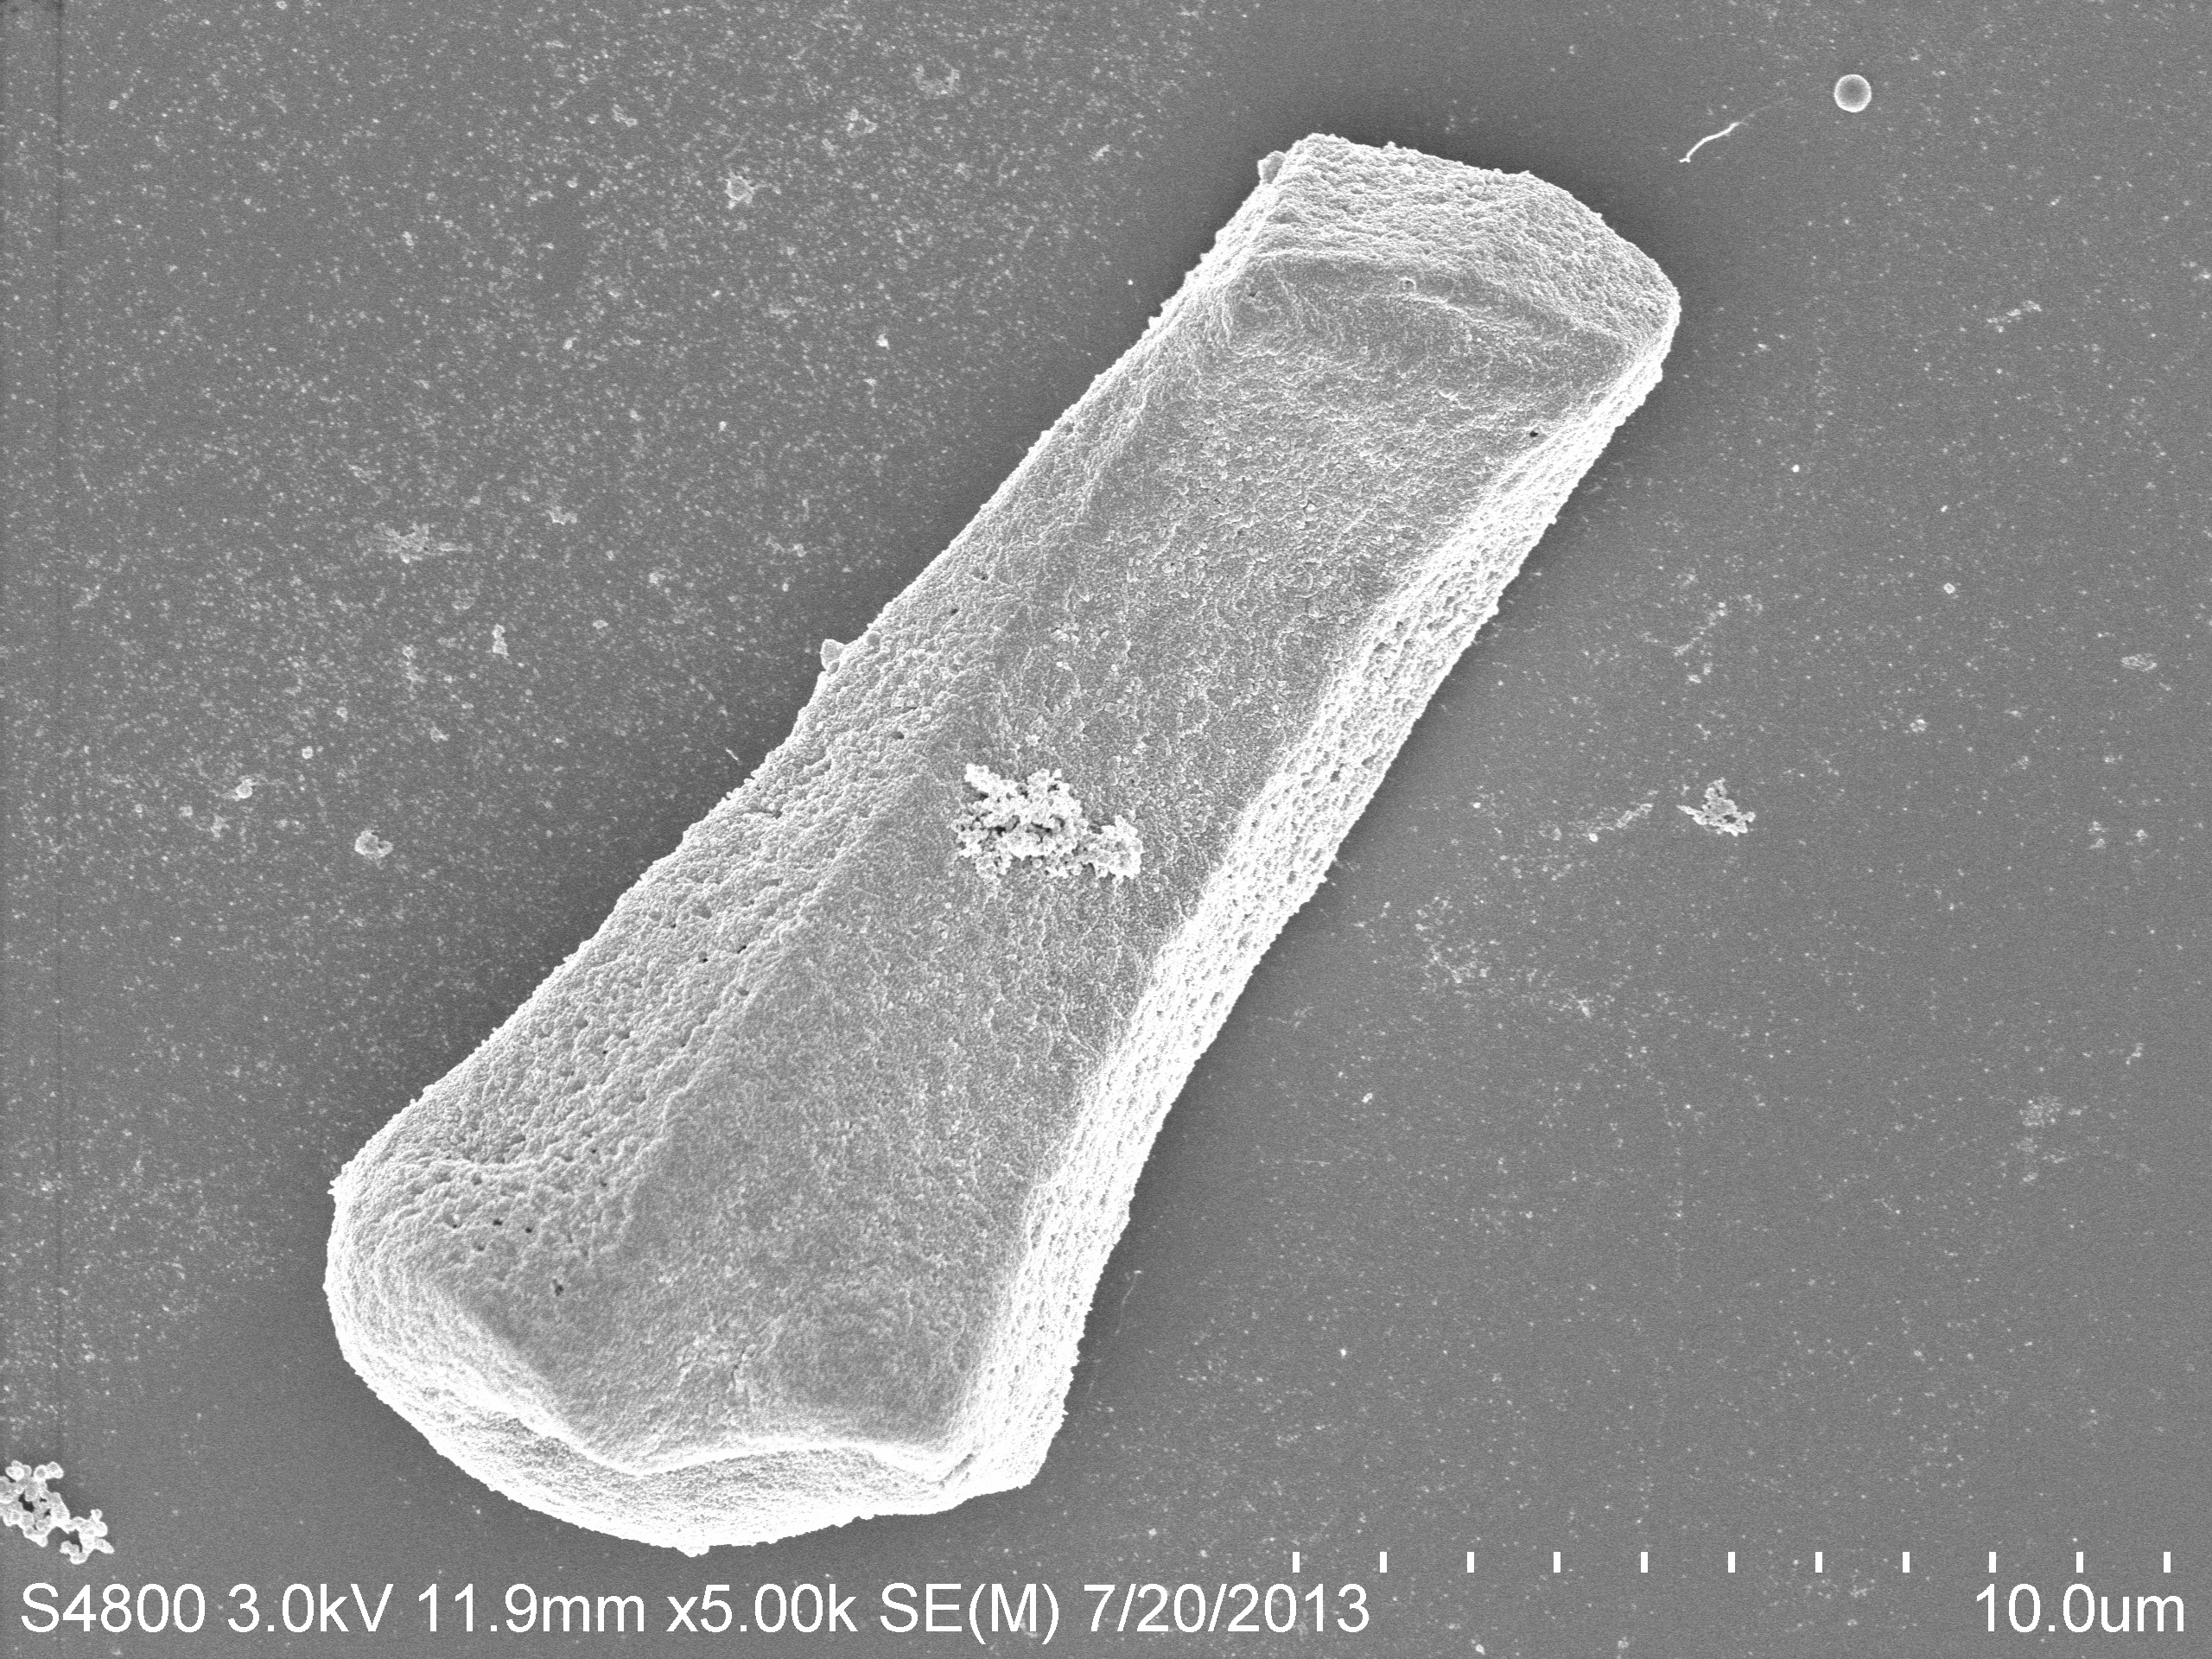

In [58]:
im.show()

In [59]:
image_exif = im._getexif()
exif = { ExifTags.TAGS[k]: v for k, v in image_exif.items() if k in ExifTags.TAGS and type(v) is not bytes }


In [60]:
exif

{'ImageWidth': 2560,
 'ImageLength': 1920,
 'BitsPerSample': 8,
 'Compression': 1,
 'ColorMap': (0,
  256,
  512,
  768,
  1024,
  1280,
  1536,
  1792,
  2048,
  2304,
  2560,
  2816,
  3072,
  3328,
  3584,
  3840,
  4096,
  4352,
  4608,
  4864,
  5120,
  5376,
  5632,
  5888,
  6144,
  6400,
  6656,
  6912,
  7168,
  7424,
  7680,
  7936,
  8192,
  8448,
  8704,
  8960,
  9216,
  9472,
  9728,
  9984,
  10240,
  10496,
  10752,
  11008,
  11264,
  11520,
  11776,
  12032,
  12288,
  12544,
  12800,
  13056,
  13312,
  13568,
  13824,
  14080,
  14336,
  14592,
  14848,
  15104,
  15360,
  15616,
  15872,
  16128,
  16384,
  16640,
  16896,
  17152,
  17408,
  17664,
  17920,
  18176,
  18432,
  18688,
  18944,
  19200,
  19456,
  19712,
  19968,
  20224,
  20480,
  20736,
  20992,
  21248,
  21504,
  21760,
  22016,
  22272,
  22528,
  22784,
  23040,
  23296,
  23552,
  23808,
  24064,
  24320,
  24576,
  24832,
  25088,
  25344,
  25600,
  25856,
  26112,
  26368,
  26624,
  2688

In [64]:
resource = project.resource('imResource')

We can extend the base profile in Coscine to fit some of this metadata. Which we've already done! Yay!

Let's create a new resource within out project. We can do this via [Coscine web interface](coscine.rwth-aachen.de/) or we can try using the API and Python SDK (but in tests we got unspecified errors...)

In [66]:
print(resource.name)

imResource


In [67]:
metadata = resource.metadata_form()

In [68]:
print(metadata)

+---+---------+-----------------+-------+
| C | Type    | Property        | Value |
+---+---------+-----------------+-------+
| S | [str]   | Compression     |       |
| S | [str]   | Resolution Unit |       |
|   | [float] | X Resolution    |       |
|   | [float] | Y Resolution    |       |
|   | [float] | Image Width     |       |
|   | [float] | Image Length    |       |
+---+---------+-----------------+-------+


In [72]:
metadata.selection('Compression')

['Uncompressed', 'PackBits', 'LZW ', 'JPEG', 'Deflate']

In [76]:
compressionMap = {
    1:'Uncompressed', 
    6:'JPEG', 
    32773:'PackBits',
    5:'LZW', 
    8:'Deflate'
    }

In [74]:
exif

{'ImageWidth': 2560,
 'ImageLength': 1920,
 'BitsPerSample': 8,
 'Compression': 1,
 'ColorMap': (0,
  256,
  512,
  768,
  1024,
  1280,
  1536,
  1792,
  2048,
  2304,
  2560,
  2816,
  3072,
  3328,
  3584,
  3840,
  4096,
  4352,
  4608,
  4864,
  5120,
  5376,
  5632,
  5888,
  6144,
  6400,
  6656,
  6912,
  7168,
  7424,
  7680,
  7936,
  8192,
  8448,
  8704,
  8960,
  9216,
  9472,
  9728,
  9984,
  10240,
  10496,
  10752,
  11008,
  11264,
  11520,
  11776,
  12032,
  12288,
  12544,
  12800,
  13056,
  13312,
  13568,
  13824,
  14080,
  14336,
  14592,
  14848,
  15104,
  15360,
  15616,
  15872,
  16128,
  16384,
  16640,
  16896,
  17152,
  17408,
  17664,
  17920,
  18176,
  18432,
  18688,
  18944,
  19200,
  19456,
  19712,
  19968,
  20224,
  20480,
  20736,
  20992,
  21248,
  21504,
  21760,
  22016,
  22272,
  22528,
  22784,
  23040,
  23296,
  23552,
  23808,
  24064,
  24320,
  24576,
  24832,
  25088,
  25344,
  25600,
  25856,
  26112,
  26368,
  26624,
  2688

In [73]:
exif['Compression']

1

In [77]:
metadata['Compression'] = compressionMap[exif['Compression']]

In [80]:
print(metadata)

+---+---------+-----------------+--------------+
| C | Type    | Property        | Value        |
+---+---------+-----------------+--------------+
| S | [str]   | Compression     | Uncompressed |
| S | [str]   | Resolution Unit |              |
|   | [float] | X Resolution    |              |
|   | [float] | Y Resolution    |              |
|   | [float] | Image Width     |              |
|   | [float] | Image Length    |              |
+---+---------+-----------------+--------------+


In [81]:
metadata.selection('Resolution Unit')

['No absolute unit of measure',
 'pixels per inch (PPI)',
 'pixels per centimeter (PPCM)']

In [82]:
resMap = {
    1:'No absolute unit of measure',
    2:'pixels per inch (PPI)',
    3:'pixels per centimeter (PPCM)'
}

In [86]:
metadata['Resolution Unit'] = resMap[exif['ResolutionUnit']]
print(metadata)

+---+---------+-----------------+-----------------------+
| C | Type    | Property        | Value                 |
+---+---------+-----------------+-----------------------+
| S | [str]   | Compression     | Uncompressed          |
| S | [str]   | Resolution Unit | pixels per inch (PPI) |
|   | [float] | X Resolution    |                       |
|   | [float] | Y Resolution    |                       |
|   | [float] | Image Width     |                       |
|   | [float] | Image Length    |                       |
+---+---------+-----------------+-----------------------+


In [ ]:
metadataCrossMap = {
    "Compression":compressionMap[exif['Compression']],
    "Resolution Unit":resMap[exif['ResolutionUnit']],
    "X Resolution" : exif['XResolution'],
    "Y Resolution" : exif['YResolution'],
    "Image Width" : exif["ImageWidth"],
    "Image Length" : exif[]

}

## Querying (meta)Data

Now we have some data in Coscine. Let's try to build a query system to search files or get statistics on what we have. 